https://rasterio.readthedocs.io/en/latest/index.html (Documentation)

#Imports

In [1]:
try:
  import geopandas as gpd
except ModuleNotFoundError as e:
  !pip install geopandas==0.12.1
  import geopandas as gpd

if gpd.__version__ != "0.12.1":
  !pip install -U geopandas==0.12.1
  import geopandas as gpd

In [1]:
try:
  import rasterio as rio
except ModuleNotFoundError as e:
  !pip install rasterio==1.3.4
  import rasterio as rio

if rio.__version__ != "1.3.4":
  !pip install -U rasterio==1.3.4
  import rasterio as rio

In [3]:
try:
  import owslib
except ModuleNotFoundError as e:
  !pip install owslib==0.25.0
  import owslib

if owslib.__version__ != "0.25.0":
  !pip install -U owslib==0.25.0
  import owslib

In [2]:
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from rasterio.plot import show


# World elevation

In [16]:
world = rio.open("/content/GDEM-10km-BW.tif")

In [21]:
world.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 4320,
 'height': 2160,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.083333333333, 0.0, -180.00416667,
        0.0, -0.083333333333, 90.00416667)}

In [22]:
world.crs

CRS.from_epsg(4326)

In [23]:
world.transform

Affine(0.083333333333, 0.0, -180.00416667,
       0.0, -0.083333333333, 90.00416667)

In [26]:
world.read().shape

(1, 2160, 4320)

Image dimensions:  (2160, 4320)


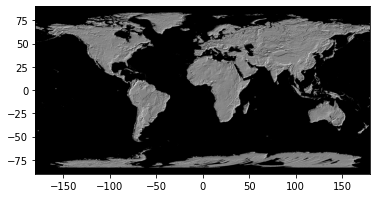

In [31]:

full_img = world.read(1)
print("Image dimensions: ", full_img.shape)
show(full_img, transform=world.transform, cmap='gray')

In [17]:
world.colorinterp[0]

<ColorInterp.gray: 1>

In [9]:
array = world.read(1)

In [11]:
array.shape

(2160, 4320)

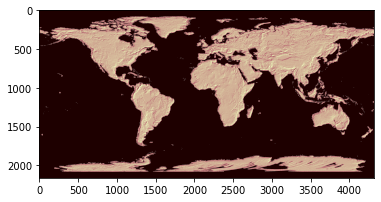

In [14]:
plt.imshow(array, cmap='pink')

In [15]:
world.close()

# Sentinel 2 data

https://scihub.copernicus.eu/dhus/#/home (Copernicus Open Access Hub)


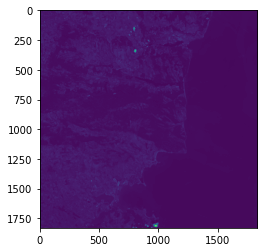

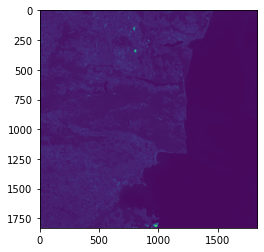

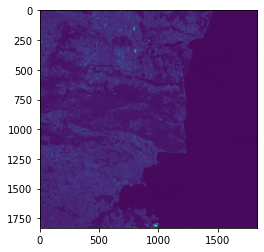

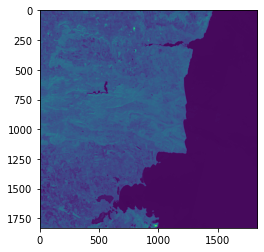

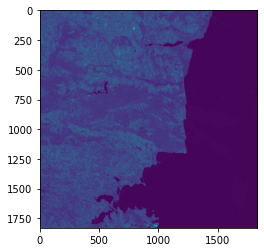

In [10]:
bands = [
    #'/content/T35TNH_20220914T085611_B01_60m.jp2',
    '/content/T35TNH_20220914T085611_B02_60m.jp2',
    '/content/T35TNH_20220914T085611_B03_60m.jp2',
    '/content/T35TNH_20220914T085611_B04_60m.jp2',
    #'/content/T35TNH_20220914T085611_B05_60m.jp2',
    #'/content/T35TNH_20220914T085611_B06_60m.jp2',
    #'/content/T35TNH_20220914T085611_B07_60m.jp2',
    '/content/T35TNH_20220914T085611_B8A_60m.jp2',
    #'/content/T35TNH_20220914T085611_B09_60m.jp2',
    '/content/T35TNH_20220914T085611_B11_60m.jp2',
    #'/content/T35TNH_20220914T085611_B12_60m.jp2',
    #'/content/T35TNH_20220914T085611_TCI_60m.jp2',
    #'/content/T35TNH_20220914T085611_AOT_60m.jp2',
    #'/content/T35TNH_20220914T085611_SCL_60m.jp2',
    #'/content/T35TNH_20220914T085611_WVP_60m.jp2',
]
arrs = []
for b in bands:
  with rio.open(b, driver='JP2OpenJPEG') as dataset:
    data = dataset.read(1)
    show(data)
    arrs.append(data)
    #print(dataset.profile)
    #f = dataset.read()
    #print(f.shape)
    

In [11]:
sentinel_img = np.array(arrs, dtype=arrs[0].dtype)
# let's check the shape of this array
sentinel_img.shape

(5, 1830, 1830)

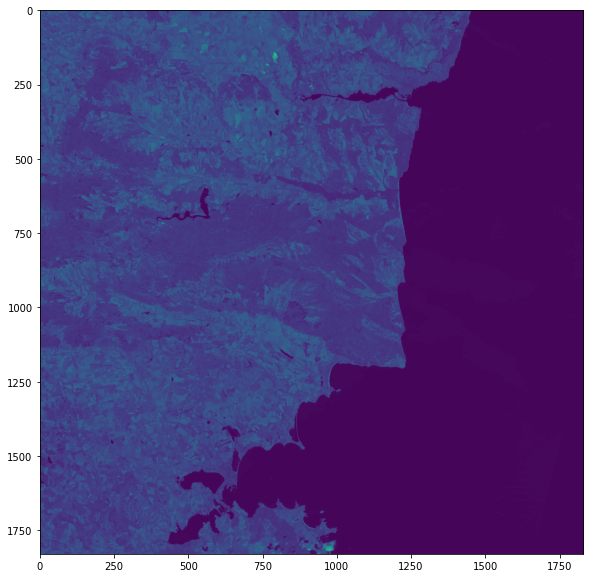

In [15]:
plt.figure(figsize = (10,10))
show(data)

In [32]:
band4 = rio.open('/content/tiff3.tiff').read(1)
band8 = rio.open('/content/tiff4.tiff').read(1)

# need to specify floats in order to get floats
ndvi = (band8.astype(float)-band4.astype(float))/(band8.astype(float)+band4.astype(float))

In [34]:
print('\nMax NDVI: {m}'.format(m=ndvi.max()))
print('Mean NDVI: {m}'.format(m=ndvi.mean()))
print('Median NDVI: {m}'.format(m=np.median(ndvi)))
print('Min NDVI: {m}'.format(m=ndvi.min()))


Max NDVI: 0.6980078670219515
Mean NDVI: 0.1831456661221804
Median NDVI: 0.14342087091421202
Min NDVI: -0.608447664559889


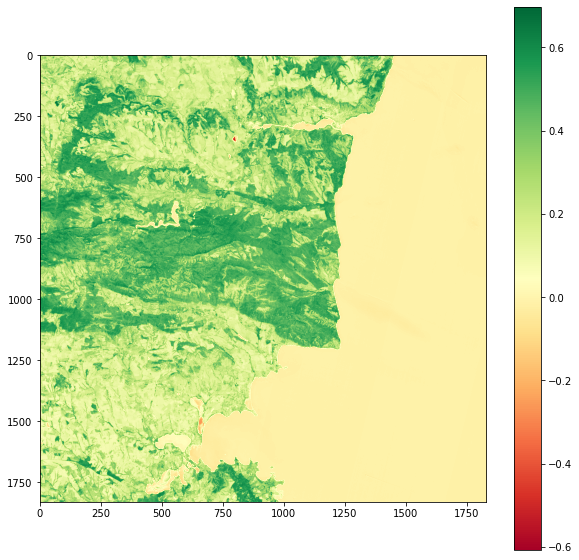

In [36]:
plt.figure(figsize = (10,10))
plt.imshow(ndvi, cmap="RdYlGn")
plt.colorbar()
plt.show()

In [37]:
red_flat = np.ndarray.flatten(band4)
nir_flat = np.ndarray.flatten(band8)

print('Array shape after: {shp} (size is {sz})'.format(shp=red_flat.shape, sz=red_flat.size))

Array shape after: (3348900,) (size is 3348900)


In [38]:
#moisture
band11 = rio.open('/content/tiff5.tiff').read(1)

moistureindex = (band8.astype(float)-band11.astype(float))/(band8.astype(float)+band11.astype(float))

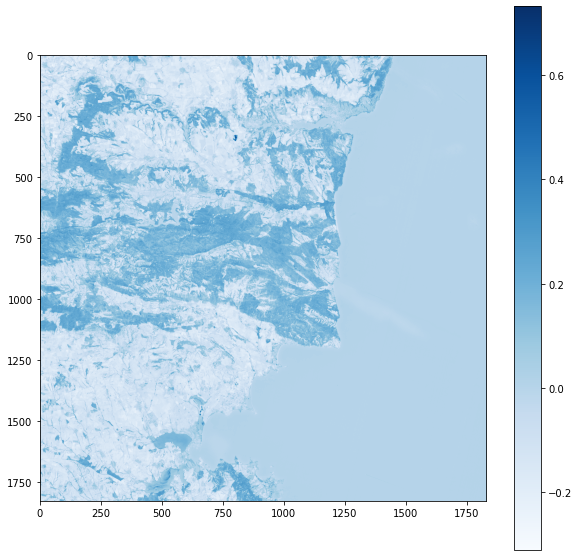

In [40]:
plt.figure(figsize = (10,10))
plt.imshow(moistureindex, cmap="Blues")
plt.colorbar()
plt.show()

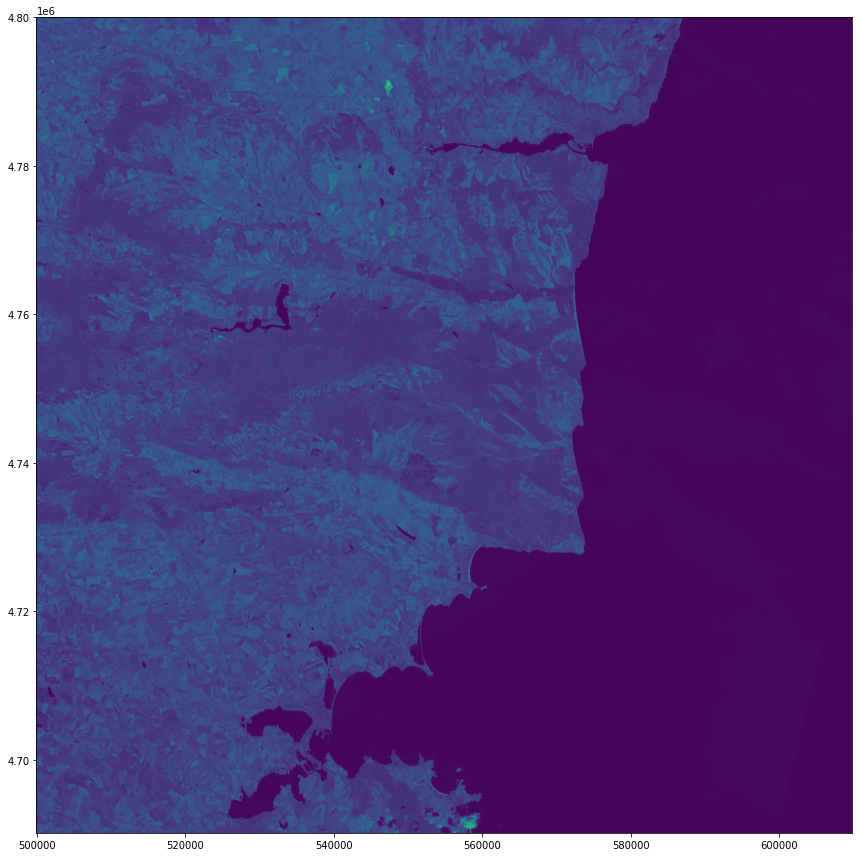

In [44]:
#agriculture
band2=rio.open("/content/T35TNH_20220914T085611_B02_60m.jp2", driver='JP2OpenJPEG')
band8=rio.open("/content/T35TNH_20220914T085611_B8A_60m.jp2", driver='JP2OpenJPEG')
band11=rio.open("/content/T35TNH_20220914T085611_B11_60m.jp2", driver='JP2OpenJPEG')

band11_geo = band11.profile
band11_geo.update({"count": 3})

with rio.open('/content/rgb_agri.tiff', 'w', **band11_geo) as dest:
# I rearanged the band order writting to 2→3→4 instead of 4→3→2
    dest.write(band11.read(1),1)
    dest.write(band8.read(1),2)
    dest.write(band2.read(1),3)

# Rescale the image (divide by 10000 to convert to [0:1] reflectance
img = rio.open('/content/rgb_agri.tiff')
# image = np.array([img.read(3), img.read(2), img.read(1)]).transpose(1,2,0)
# p2, p98 = np.percentile(image, (2,98))
# image = exposure.rescale_intensity(image, in_range=(p2, p98)) / 100000

# Plot the RGB image
plt.figure(figsize = (15,15))
show(img, transform=img.transform)

Agriculture (B11, B8, B2)
Vegetation Index (B8-B4)/(B8+B4)
Moisture Index (B8A-B11)/(B8A+B11)


https://gisgeography.com/sentinel-2-bands-combinations/

In [16]:
from skimage import exposure

In [7]:
band2=rio.open("/content/T35TNH_20220914T085611_B02_60m.jp2", driver='JP2OpenJPEG')
band3=rio.open("/content/T35TNH_20220914T085611_B03_60m.jp2", driver='JP2OpenJPEG')
band4=rio.open("/content/T35TNH_20220914T085611_B04_60m.jp2", driver='JP2OpenJPEG')
band8=rio.open("/content/T35TNH_20220914T085611_B8A_60m.jp2", driver='JP2OpenJPEG')

band2_geo = band2.profile
band2_geo.update({"count": 3})

with rio.open('/content/rgb_v2.tiff', 'w', **band2_geo) as dest:
# I rearanged the band order writting to 2→3→4 instead of 4→3→2
    dest.write(band2.read(1),1)
    dest.write(band3.read(1),2)
    dest.write(band4.read(1),3)

# Rescale the image (divide by 10000 to convert to [0:1] reflectance
img = rio.open('/content/rgb.tiff')
image = np.array([img.read(3), img.read(2), img.read(1)]).transpose(1,2,0)
p2, p98 = np.percentile(image, (2,98))
image = exposure.rescale_intensity(image, in_range=(p2, p98)) / 100000

# Plot the RGB image
plt.figure(figsize = (15,15))
show(image.transpose(2,0,1), transform=img.transform)

NameError: ignored

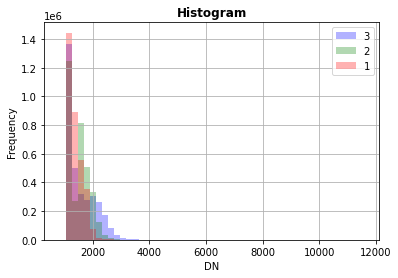

In [9]:
rio.plot.show_hist(img, bins=50, histtype='stepfilled', lw=0.0, stacked=False, alpha=0.3)

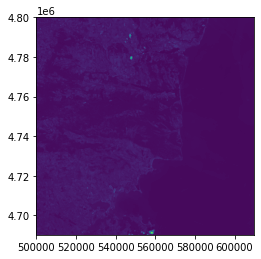

In [10]:
show(img)

In [65]:
img.crs

CRS.from_epsg(32635)

In [67]:
img.bounds

BoundingBox(left=499980.0, bottom=4690200.0, right=609780.0, top=4800000.0)

In [68]:
img.meta

{'driver': 'JP2OpenJPEG',
 'dtype': 'uint16',
 'nodata': None,
 'width': 1830,
 'height': 1830,
 'count': 3,
 'crs': CRS.from_epsg(32635),
 'transform': Affine(60.0, 0.0, 499980.0,
        0.0, -60.0, 4800000.0)}

In [69]:
img.count

3

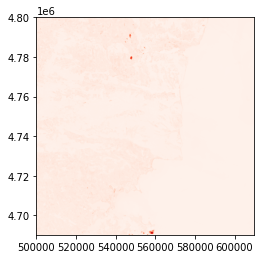

In [70]:
show((img, 1), cmap='Reds')

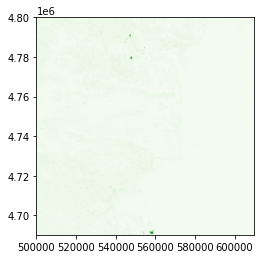

In [71]:
show((img, 1), cmap='Greens')

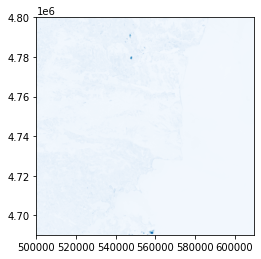

In [72]:
show((img, 1), cmap='Blues')

https://hatarilabs.com/ih-en/how-many-spectral-bands-have-the-sentinel-2-images

# 10m images


In [ ]:
bandtci=rio.open("/content/T35TNH_20220914T085611_TCI_10m.jp2", driver='JP2OpenJPEG')

In [ ]:
band2=rio.open("/content/T35TNH_20220914T085611_B02_10m.jp2", driver='JP2OpenJPEG')
band3=rio.open("/content/T35TNH_20220914T085611_B03_10m.jp2", driver='JP2OpenJPEG')
band4=rio.open("/content/T35TNH_20220914T085611_B04_10m.jp2", driver='JP2OpenJPEG')
band8=rio.open("/content/T35TNH_20220914T085611_B08_10m.jp2", driver='JP2OpenJPEG')

band2_geo = band2.profile
band2_geo.update({"count": 3})

with rio.open('/content/rgb10m.tiff', 'w', **band2_geo) as dest:
# I rearanged the band order writting to 2→3→4 instead of 4→3→2
    dest.write(band2.read(1),1)
    dest.write(band3.read(1),2)
    dest.write(band4.read(1),3)



In [11]:
# Rescale the image (divide by 10000 to convert to [0:1] reflectance
img2 = rio.open('/content/rgb10m.tiff')
image = np.array([img2.read(3), img2.read(2), img2.read(1)]).transpose(1,2,0)
p2, p98 = np.percentile(image, (2,98))


In [ ]:
image = exposure.rescale_intensity(image, in_range=(p2, p98)) / 100000

# Plot the RGB image
plt.figure(figsize = (15,15))
show(image.transpose(2,0,1), transform=img.transform)

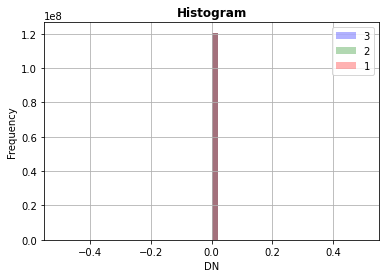

In [11]:
rio.plot.show_hist(img, bins=50, lw=0.0, stacked=False, alpha=0.3,histtype='stepfilled', title="Histogram")

# DEMs


https://search.earthdata.nasa.gov/search (EarthData Search)

In [11]:
raster_dem1 = rio.open("/content/N42E027.hgt")
raster_dem2 = rio.open("/content/N43E028.hgt", driver="SRTMHGT")
raster_dem3 = rio.open("/content/N42E028.hgt")
raster_dem4 = rio.open("/content/N43E027.hgt")

In [6]:
raster_dem1.profile

{'driver': 'SRTMHGT', 'dtype': 'int16', 'nodata': -32768.0, 'width': 3601, 'height': 3601, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0002777777777777778, 0.0, 26.999861111111112,
       0.0, -0.0002777777777777778, 43.00013888888889), 'blockysize': 1, 'tiled': False}

In [39]:
kwargs = raster_dem1.profile
kwargs.update({"driver": "GTiff"})
with rio.open('/content/dem1.tiff', 'w', **kwargs) as dest:
    dest.write(raster_dem1.read(1),1)


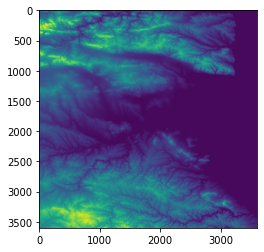

In [45]:
dem1 = rio.open("/content/dem1.tiff")
show(dem1.read(1))#, cmap = "terrain")

In [17]:
raster_dem2.meta

{'driver': 'SRTMHGT',
 'dtype': 'int16',
 'nodata': -32768.0,
 'width': 3601,
 'height': 3601,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.0002777777777777778, 0.0, 27.999861111111112,
        0.0, -0.0002777777777777778, 43.00013888888889)}

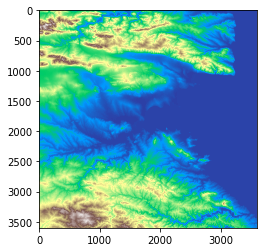

In [7]:
plt.imshow(raster_dem1.read(1), cmap='terrain')


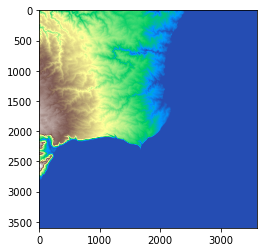

In [8]:
plt.imshow(raster_dem2.read(1), cmap='terrain')

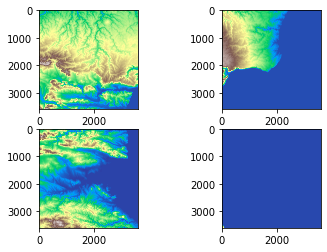

In [16]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.imshow(raster_dem4.read(1), cmap='terrain')
ax2.imshow(raster_dem2.read(1), cmap='terrain')
ax3.imshow(raster_dem1.read(1), cmap='terrain')
ax4.imshow(raster_dem3.read(1), cmap='terrain')


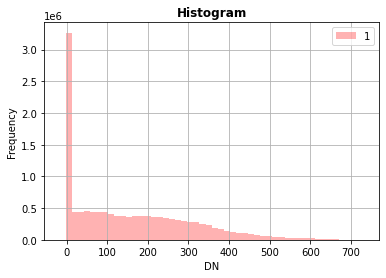

In [19]:
rio.plot.show_hist(raster_dem1, bins=50, lw=0.0, stacked=False, alpha=0.3,histtype='stepfilled', title="Histogram")

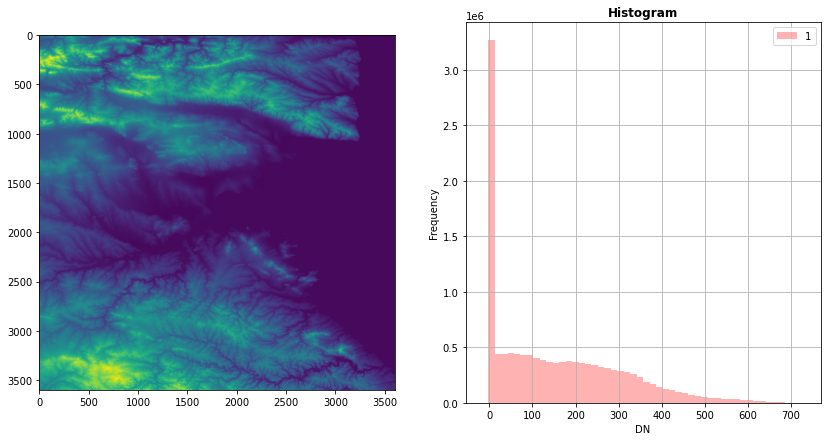

In [20]:
fig, (axrgb, axhist) = plt.subplots(1, 2, figsize=(14,7))
show(raster_dem1.read(1), ax=axrgb)

rio.plot.show_hist(raster_dem1, bins=50, histtype='stepfilled',
          lw=0.0, stacked=False, alpha=0.3, ax=axhist)

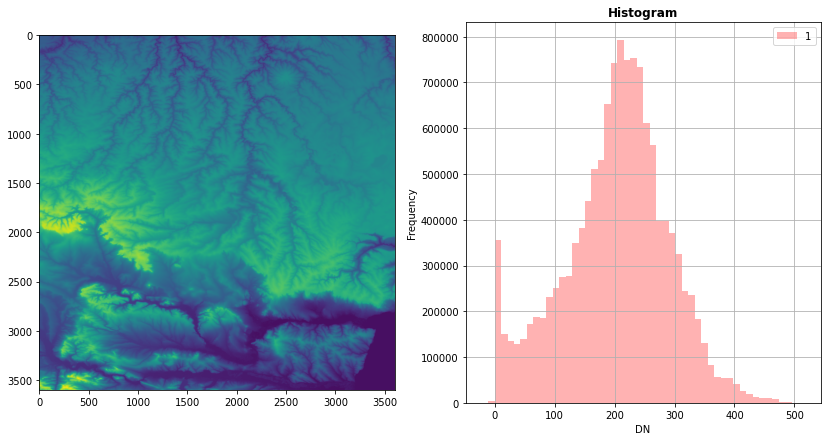

In [21]:
fig, (axrgb, axhist) = plt.subplots(1, 2, figsize=(14,7))
show(raster_dem4.read(1), ax=axrgb)

rio.plot.show_hist(raster_dem4, bins=50, histtype='stepfilled',
          lw=0.0, stacked=False, alpha=0.3, ax=axhist)

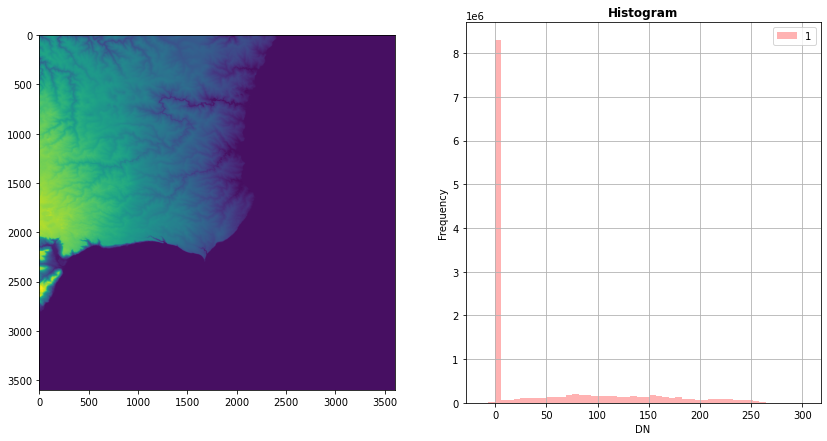

In [22]:
fig, (axrgb, axhist) = plt.subplots(1, 2, figsize=(14,7))
show(raster_dem2.read(1), ax=axrgb)

rio.plot.show_hist(raster_dem2, bins=50, histtype='stepfilled',
          lw=0.0, stacked=False, alpha=0.3, ax=axhist)

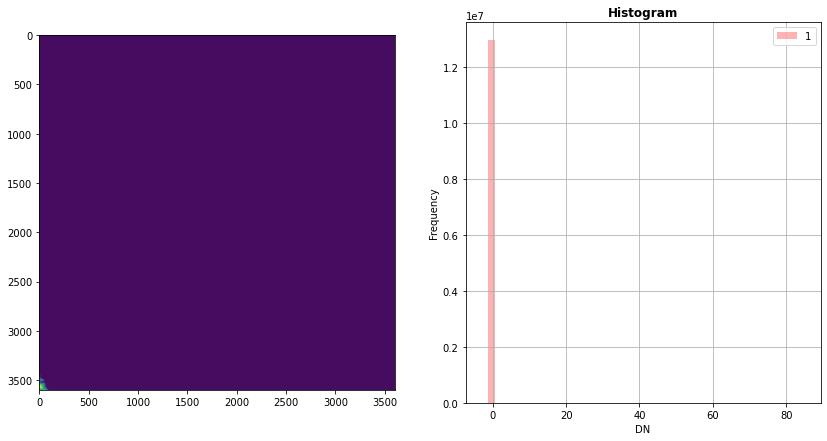

In [23]:
fig, (axrgb, axhist) = plt.subplots(1, 2, figsize=(14,7))
show(raster_dem3.read(1), ax=axrgb)

rio.plot.show_hist(raster_dem3, bins=50, histtype='stepfilled',
          lw=0.0, stacked=False, alpha=0.3, ax=axhist)